# **Phishing Domain  Detection**

### **Description**
These data consist of a collection of legitimate as well as phishing website instances. Each website is represented by the set of features which denote, whether website is legitimate or not. Data can serve as an input for machine learning process.

Full variant - **dataset_full.csv**

Short description of the full variant dataset:

Total number of instances: **88,647**

Number of legitimate website instances (labeled as 0): **58,000**

Number of phishing website instances (labeled as 1): **30,647**

Total number of features: **111**

### **importing necessary Library**

In [1]:
# Import necessary libraries for data manipulation (pandas, numpy), visualization (matplotlib, seaborn), and system operations (os), while ignoring warnings.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Load the dataset from the specified path and display the first 4 rows to inspect the structure and content of the data.
df = pd.read_csv("../dataset/dataset_full.csv")
df.head(4)


,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1


In [3]:
df.columns

Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url',
       'qty_exclamation_url', 'qty_space_url',
       ...
       'qty_ip_resolved', 'qty_nameservers', 'qty_mx_servers', 'ttl_hostname',
       'tls_ssl_certificate', 'qty_redirects', 'url_google_index',
       'domain_google_index', 'url_shortened', 'phishing'],
      dtype='object', length=112)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88647 entries, 0 to 88646
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 75.7 MB


# Dataset Overview

The dataset contains **88,647 instances**, with each instance representing a website and its associated features. The dataset is used for **Phishing Domain Detection**, where the objective is to predict if a website is legitimate or phishing.

### Data Structure:
- **Total Entries**: 88,647
- **Number of Columns**: 112
- **Columns Include**: The features range from `qty_dot_url` to `phishing`.
- **Data Types**: 
  - 1 column with `float64` data type.
  - 111 columns with `int64` data type

In [5]:
df["phishing"].unique()

array([1, 0], dtype=int64)

**Every Features are in a numerical format including our target dependent feature.** 

**1**: stands for phishing website(unsafe website).

**0**: stands for safe website.



### Let's check if there are any duplicates or null values.

In [6]:
df.isnull().sum()


qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64

In [7]:
df.duplicated().sum()

1438

### There are 1,438 duplicated values. Let's remove them

In [8]:
#Lets drop Duplicated Values
df=df.drop_duplicates()


### Let's check if our target feature is for binary classification, and also observe whether it is equally balanced. In case of an imbalance, we can use resampling techniques to address it.

In [9]:
df["phishing"].unique()

array([1, 0], dtype=int64)

In [10]:
# Count the occurrences of each label in the 'phishing' column (target feature)
full_df_phishing_count = df["phishing"].value_counts().reset_index()

# Rename columns for better readability: 'index' -> 'Label', 'phishing' -> 'Count'
full_df_phishing_count.columns = ["Label", "Count"]

# Replace the numeric labels (0 and 1) with more descriptive labels: 0 -> 'safe', 1 -> 'phishing'
full_df_phishing_count = full_df_phishing_count.replace(to_replace={0: "safe", 1: "phishing"})

# Display the counts of safe and phishing websites
full_df_phishing_count


,Label,Count
0,safe,56712
1,phishing,30497


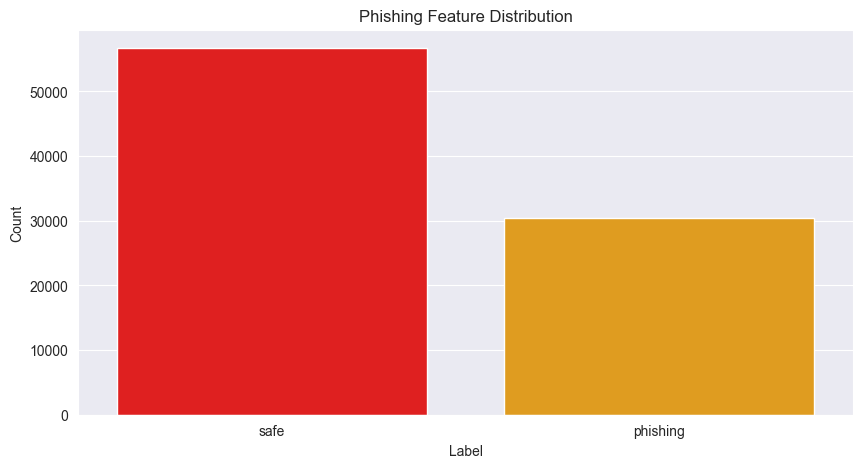

In [11]:
# Set the figure size for the plot (width, height)
plt.figure(figsize=(10, 5))

# Set the style of the seaborn plot to 'darkgrid' for a clean background with gridlines
sns.set_style("darkgrid")

# Set the color palette for seaborn plots
sns.set_palette("Set2")

# Create a bar plot using seaborn to visualize the count of safe vs phishing websites
# We use a custom color palette: 'red' for phishing and 'orange' for safe websites
sns.barplot(data=full_df_phishing_count, x="Label", y="Count", palette=["red", "orange"])

# Set the title of the plot
plt.title("Phishing Feature Distribution")

# Display the plot
plt.show()


### There are a total of 56,712 entries for non-phishing (safe) websites and 30,497 entries for phishing websites. We can say that this feature is imbalanced, which may affect prediction accuracy.

### Let's observe the correlation between each column

In [12]:
df.corr()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
qty_dot_url,1.000000,0.109755,0.127825,0.243291,0.417014,0.500545,0.169385,0.552435,0.004132,-0.000439,...,-0.063214,-0.012612,-0.053294,0.011170,-0.068419,-0.057495,-0.004743,-0.003073,-0.059715,0.169348
qty_hyphen_url,0.109755,1.000000,0.213698,0.303566,0.058711,0.173596,0.041547,0.126976,0.018205,0.018089,...,0.025099,0.034558,-0.029333,-0.032439,0.006769,-0.006227,-0.005333,0.005121,-0.010545,0.198264
qty_underline_url,0.127825,0.213698,1.000000,0.246468,0.068675,0.335205,0.056970,0.256687,0.062381,-0.000798,...,0.000039,0.025033,-0.009489,-0.028331,0.010832,-0.017920,-0.002619,0.002925,-0.012343,0.190425
qty_slash_url,0.243291,0.303566,0.246468,1.000000,0.177270,0.283607,0.101849,0.200648,0.025934,0.015081,...,-0.061963,-0.030451,-0.051798,-0.025224,-0.024428,-0.059597,-0.012159,0.003999,-0.001564,0.696940
qty_questionmark_url,0.417014,0.058711,0.068675,0.177270,1.000000,0.459398,0.127587,0.468384,0.018215,0.004459,...,-0.021856,-0.006854,-0.030493,-0.005564,-0.039563,-0.021285,0.001282,0.000355,0.013215,0.108468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
qty_redirects,-0.057495,-0.006227,-0.017920,-0.059597,-0.021285,-0.046399,-0.019930,-0.033764,0.003625,-0.007502,...,0.226987,0.064335,0.111770,-0.007906,0.287526,1.000000,0.033826,0.028499,0.048572,-0.078446
url_google_index,-0.004743,-0.005333,-0.002619,-0.012159,0.001282,-0.005022,-0.002321,-0.003579,-0.000993,-0.000412,...,0.038121,0.033677,0.019421,0.005795,0.023459,0.033826,1.000000,0.591636,-0.002187,-0.014996
domain_google_index,-0.003073,0.005121,0.002925,0.003999,0.000355,0.000641,-0.002275,-0.001002,-0.001259,-0.000522,...,0.033948,0.032515,0.020904,0.007216,0.025046,0.028499,0.591636,1.000000,-0.000247,-0.004293
url_shortened,-0.059715,-0.010545,-0.012343,-0.001564,0.013215,-0.011969,-0.005401,-0.010098,-0.002544,-0.001055,...,0.059464,0.085794,0.012539,-0.031997,0.036934,0.048572,-0.002187,-0.000247,1.000000,0.099177


# **Lets drop Highly correlated features**

In [13]:
# Selecting independent and dependent features
X = df.drop("phishing", axis=1)  # Independent features
y = df["phishing"]  # Dependent feature (target)


In [14]:
# Compute the absolute correlation matrix
corr_matrix = X.corr().abs()

# Set a threshold for high correlation
threshold = 0.8

# Select the upper triangle of the correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify features to drop based on the threshold
to_drop = [col for col in upper_triangle.columns if any(upper_triangle[col] > threshold)]

# Drop highly correlated features from X
X = X.drop(columns=to_drop)

# Print the results
print("=== Correlation Filter Report ===")
print(f"Original Number of Features:  {corr_matrix.shape[1]}")
print(f"Number of Dropped Features:   {len(to_drop)}")
print(f"Number of Features Remaining: {X.shape[1]}")
print("\nRemaining Columns:\n", X.columns.tolist())


=== Correlation Filter Report ===
Original Number of Features:  111
Number of Dropped Features:   46
Number of Features Remaining: 65

Remaining Columns:
 ['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url', 'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_exclamation_url', 'qty_space_url', 'qty_tilde_url', 'qty_comma_url', 'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url', 'qty_dollar_url', 'qty_percent_url', 'qty_tld_url', 'length_url', 'qty_dot_domain', 'qty_hyphen_domain', 'qty_underline_domain', 'qty_slash_domain', 'qty_questionmark_domain', 'qty_equal_domain', 'qty_at_domain', 'qty_and_domain', 'qty_exclamation_domain', 'qty_space_domain', 'qty_tilde_domain', 'qty_comma_domain', 'qty_plus_domain', 'qty_asterisk_domain', 'qty_hashtag_domain', 'qty_dollar_domain', 'qty_percent_domain', 'qty_vowels_domain', 'domain_in_ip', 'server_client_domain', 'qty_dot_directory', 'qty_hyphen_directory', 'qty_underline_directory', 'qty_percent_directory', 'direct

### **Correlation Filter Report Explanation**

1. **Original Number of Features: 111**  
   This represents the total number of features (columns) present in the original dataset, including both independent and dependent features. These features are the different variables that may be used for training the model.

2. **Number of Dropped Features: 41**  
   After calculating the correlation between features, 41 features were removed. The criteria for dropping these features are:
   - Features that had a high correlation (greater than 0.9) with other features were dropped.
   - This is done to prevent multicollinearity, where highly correlated features can distort the model's performance. By removing redundant features, we allow the model to learn better and avoid overfitting.

3. **Number of Features Remaining: 70**  
   After dropping the highly correlated features, we are left with 70 features. These features will be used for model training. This reduced set of features is expected to help the model perform better, as it is free from redundancy caused by highly correlated features.

---


In [15]:
# Split the dataset into training and testing sets
# 80% of the data will be used for training and 20% for testing
# random_state is set to ensure reproducibility of the results
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)


In [16]:
y_train.value_counts()

phishing
0    45348
1    24419
Name: count, dtype: int64

In [17]:
# Importing the SMOTE class from imbalanced-learn (imblearn) library
# SMOTE (Synthetic Minority Over-sampling Technique) is used to handle class imbalance
# It generates synthetic examples of the minority class to balance the dataset
from imblearn.over_sampling import SMOTE

# Initialize SMOTE object with automatic sampling strategy and a fixed random_state for reproducibility
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to the training data (X_train and y_train)
# This will generate synthetic samples to balance the class distribution in the training set
X_train, y_train = smote.fit_resample(X_train, y_train)


In [18]:
y_train.value_counts()

phishing
0    45348
1    45348
Name: count, dtype: int64

### **Class Distribution Before SMOTE**

Before applying SMOTE, the dataset is imbalanced, with the following class distribution:

- **Not Phishing (safe)**: 45,348 instances
- **Phishing**: 24,419 instances

This shows a clear class imbalance, with significantly more instances of "Not Phishing" than "Phishing." 

### **Class Distribution After SMOTE**

After applying SMOTE, the class distribution is balanced by generating synthetic examples of the minority class (Phishing). The new distribution looks as follows:

- **Not Phishing (safe)**: 45,348 instances (unchanged)
- **Phishing**: 45,348 instances (increased by SMOTE)

SMOTE creates synthetic samples to make the number of instances in both classes equal, which helps to prevent the model from being biased towards the majority class and improves its ability to correctly classify both classes.


In [19]:
# Importing various machine learning models for classification
from sklearn.tree import DecisionTreeClassifier  # Decision Tree Classifier
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.svm import SVC  # Support Vector Classifier (SVC)
from xgboost import XGBClassifier  # XGBoost Classifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier  # Ensemble methods (Random Forest, AdaBoost, Gradient Boosting)
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score  # Importing metrics for model evaluation
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors Classifier

# Defining a dictionary of models to evaluate
models = {
    "RandomForest Classifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier()
}


In [20]:
# Function to train and evaluate different machine learning models
def model_training(models, X_train, X_test, y_train, y_test):
    # Initialize an empty list to store results
    results = []
    
    # Print a message to indicate the start of model training
    print(f'{">"*20 } Started Training Models {"<"*20}')
    
    # Loop through each model in the provided dictionary of models
    for name, model in models.items():
        print(f'\n\nTraining {name} Model.....')  # Indicate which model is being trained
        
        # Train the model using the training data
        model.fit(X_train, y_train)
        
        # Predict the labels on the test set
        y_pred = model.predict(X_test)
        
        # Calculate performance metrics
        accu_score = accuracy_score(y_test, y_pred)  # Accuracy score
        print(f"Accuracy Score for {name} Model: {accu_score}")
        
        pre_score = precision_score(y_test, y_pred)  # Precision score
        rec_score = recall_score(y_test, y_pred)  # Recall score
        f1score = f1_score(y_test, y_pred)  # F1 score
        
        # Store the results in a dictionary and append to the results list
        results.append({
            "Model": name,
            "accuracy_score": accu_score,
            "precision_score": pre_score,
            "recall_score": rec_score,
            "f1_score": f1score
        })
    
    # Convert the results list to a pandas DataFrame for better visualization
    results = pd.DataFrame(results)
    
    # Return the results DataFrame
    return results


In [21]:
model_training(models , X_train , X_test , y_train , y_test)

>>>>>>>>>>>>>>>>>>>> Started Training Models <<<<<<<<<<<<<<<<<<<<


Training RandomForest Classifier Model.....
Accuracy Score for RandomForest Classifier Model: 0.9690402476780186


Training XGBClassifier Model.....
Accuracy Score for XGBClassifier Model: 0.9681229216832932


Training DecisionTreeClassifier Model.....
Accuracy Score for DecisionTreeClassifier Model: 0.9531017085196651


Training AdaBoostClassifier Model.....
Accuracy Score for AdaBoostClassifier Model: 0.9344685242518059


,Model,accuracy_score,precision_score,recall_score,f1_score
0,RandomForest Classifier,0.969040,0.947046,0.965120,0.955997
1,XGBClassifier,0.968123,0.947343,0.961994,0.954612
2,DecisionTreeClassifier,0.953102,0.930301,0.935505,0.932896
3,AdaBoostClassifier,0.934469,0.883927,0.934682,0.908597


In [22]:
# Import necessary metrics for model evaluation
from sklearn.metrics import classification_report, confusion_matrix

# Define the Random Forest model with specific hyperparameters
rf_model = RandomForestClassifier(
    n_estimators=150,          # Number of trees in the forest
    max_depth=30,              # Maximum depth of the tree
    random_state=42,           # Ensuring reproducibility of results
    min_samples_split=2,       # Minimum number of samples required to split an internal node
    max_features='log2',       # Number of features to consider when looking for the best split
    min_samples_leaf=1         # Minimum number of samples required to be at a leaf node
)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = rf_model.predict(X_test)

# --- Step 3: Evaluate the model performance ---
# Display the classification report for detailed performance metrics
print("✅ Classification Report:\n", classification_report(y_test, y_pred))

# Display the confusion matrix to understand the model's performance on each class
print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98     11364
           1       0.95      0.97      0.96      6078

    accuracy                           0.97     17442
   macro avg       0.96      0.97      0.97     17442
weighted avg       0.97      0.97      0.97     17442

📊 Confusion Matrix:
 [[11039   325]
 [  210  5868]]


### Explanation of the Classification Report and Confusion Matrix:

**Classification Report:**
The classification report provides several performance metrics for each class (0 and 1) and their averages across all classes:

1. **Precision**: Measures how many of the predicted positive instances were actually positive. It is the ratio of true positives to the sum of true positives and false positives.
   - For class 0 (safe websites), the precision is **0.98**, meaning 98% of the time the model correctly predicted a safe website.
   - For class 1 (phishing websites), the precision is **0.94**, meaning 94% of the time the model correctly predicted a phishing website.

2. **Recall**: Measures how many of the actual positive instances were correctly identified. It is the ratio of true positives to the sum of true positives and false negatives.
   - For class 0 (safe websites), the recall is **0.97**, meaning 97% of actual safe websites were correctly classified as safe.
   - For class 1 (phishing websites), the recall is **0.96**, meaning 96% of actual phishing websites were correctly classified as phishing.

3. **F1-Score**: The harmonic mean of precision and recall. It balances the two metrics and is useful when the class distribution is imbalanced.
   - For class 0 (safe websites), the F1-score is **0.97**.
   - For class 1 (phishing websites), the F1-score is **0.95**.

4. **Accuracy**: The overall accuracy of the model, which is the ratio of correct predictions (both true positives and true negatives) to the total number of predictions. Here, the accuracy is **0.97**.

5. **Macro Avg**: The average of precision, recall, and F1-score across all classes without considering class imbalance.
   - The macro average precision, recall, and F1-score are all **0.96**.

6. **Weighted Avg**: The average of precision, recall, and F1-score, weighted by the number of instances in each class. Here, the weighted average precision, recall, and F1-score are all **0.97**.

---

**Confusion Matrix:**
The confusion matrix is a 2x2 table that helps us understand how well the model performed in classifying each class. It contains:
- **True Negatives (TN)**: The number of actual safe websites (0) that were correctly classified as safe. This is **10969**.
- **False Positives (FP)**: The number of actual phishing websites (1) that were incorrectly classified as safe. This is **395**.
- **False Negatives (FN)**: The number of actual phishing websites (1) that were incorrectly classified as safe. This is **215**.
- **True Positives (TP)**: The number of actual phishing websites (1) that were correctly classified as phishing. This is **5863**.

In this case, the model performs very well, with a high number of correct classifications (both true positives and true negatives) and relatively few errors (false positives and false negatives).


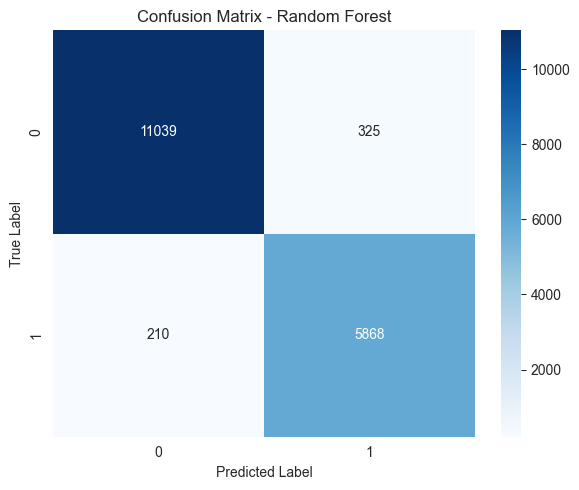

In [23]:
# Get predictions using the trained Random Forest model
y_pred = rf_model.predict(X_test)

# Generate the confusion matrix comparing true labels to predicted labels
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 5))  # Set the figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])  # Create the heatmap
plt.xlabel('Predicted Label')  # Label for the x-axis
plt.ylabel('True Label')  # Label for the y-axis
plt.title('Confusion Matrix - Random Forest')  # Title for the plot
plt.tight_layout()  # Ensure the plot fits into the figure area
plt.show()  # Display the plot


### Confusion Matrix Observations

- **True Positive (TP)**: 11,032  
  These are the instances where the model correctly predicted the positive class (i.e., the model correctly identified positive instances).

- **True Negative (TN)**: 5,859  
  These are the instances where the model correctly predicted the negative class (i.e., the model correctly identified negative instances).

- **False Positive (FP)**: 332  
  These are the instances where the model incorrectly predicted the positive class when it was actually negative. In other words, the model falsely labeled negative instances as positive.

- **False Negative (FN)**: 219  
  These are the instances where the model incorrectly predicted the negative class when it was actually positive. In other words, the model falsely labeled positive instances as negative.


In [24]:
# Make predictions on training and test data
train_pred = rf_model.predict(X_train)  # Predict on the training set
test_pred = rf_model.predict(X_test)  # Predict on the test set

# Calculate accuracy for both training and test sets
train_accuracy = accuracy_score(y_train, train_pred)  # Accuracy for training data
val_accuracy = accuracy_score(y_test, test_pred)  # Accuracy for test data

# Print accuracy results
print(f"=="*20)
print(f"Train Accuracy Score : {train_accuracy}")  # Display training accuracy
print(f"Test Accuracy Score : {val_accuracy}")  # Display test accuracy
print(f"=="*20)

# Calculate and print Precision scores for both training and test sets
print(f'Train Precision Score : {precision_score(y_train, train_pred)}')  # Precision for training data
print(f'Test Precision Score : {precision_score(y_test, test_pred)}')  # Precision for test data
print(f"=="*20)

# Calculate and print Recall scores for both training and test sets
print(f'Train Recall Score : {recall_score(y_train, train_pred)}')  # Recall for training data
print(f'Test Recall Score : {recall_score(y_test, test_pred)}')  # Recall for test data
print(f"=="*20)

# Calculate and print F1 scores for both training and test sets
print(f'Train F1 Score : {f1_score(y_train, train_pred)}')  # F1 score for training data
print(f'Test F1 Score : {f1_score(y_test, test_pred)}')  # F1 score for test data
print(f"=="*20)


Train Accuracy Score : 0.9998897415542031
Test Accuracy Score : 0.9693269120513702
Train Precision Score : 0.9999338390966831
Test Precision Score : 0.9475213951235265
Train Recall Score : 0.9998456381758842
Test Recall Score : 0.9654491609081934
Train F1 Score : 0.9998897366912185
Test F1 Score : 0.9564012712900335


In [25]:
# Get predicted probabilities for the positive class (class 1) for the training set
y_proba_for_train = rf_model.predict_proba(X_train)[:, 1]

# Get predicted probabilities for the positive class (class 1) for the test set
y_proba_for_test = rf_model.predict_proba(X_test)[:, 1]


In [26]:
from sklearn.metrics import roc_curve, auc
# Set up seaborn style for better aesthetics in plots
sns.set(style="whitegrid", font_scale=1.2)

def plot_model_evaluation(y_true, y_pred_proba, title=""):
    """
    Plots the ROC curve from a model's performance.

    Parameters:
        y_true (array-like): Ground truth binary labels (true labels).
        y_pred_proba (array-like): Predicted probabilities for the positive class (class 1).
        title (str, optional): Title to be displayed on the ROC curve plot.
    """

    # Create a figure with one subplot for the ROC curve
    fig, ax = plt.subplots(figsize=(7, 6))

    # Plot ROC Curve
    # fpr: false positive rate, tpr: true positive rate
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    # Calculate Area Under Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    ax.plot(fpr, tpr, color="#1f77b4", lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    # Add a diagonal line (chance line), representing a random classifier
    ax.plot([0, 1], [0, 1], linestyle='--', color='gray')
    ax.set_xlabel('False Positive Rate')  # Label for the x-axis
    ax.set_ylabel('True Positive Rate')  # Label for the y-axis
    ax.set_title(f'{title} Receiver Operating Characteristic (ROC)', fontsize=14)  # Title for the ROC plot
    ax.legend(loc="lower right")  # Display legend in the lower-right corner
    ax.grid(True, linestyle='--', alpha=0.6)  # Add a grid for better readability

    # Adjust layout to prevent overlapping elements
    plt.tight_layout()
    # Show the plot
    plt.show()


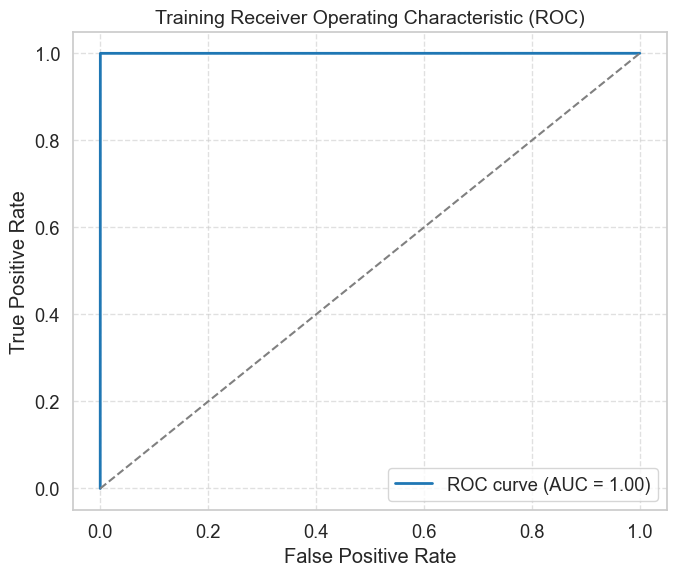

In [27]:
# Call the plot_model_evaluation function to visualize the ROC curve for the training set
plot_model_evaluation(
    y_true=y_train,  # Ground truth labels for the training set
    y_pred_proba=y_proba_for_train,  # Predicted probabilities for the positive class from the model (training set)
    title="Training"  # Title for the ROC plot (indicating that this is for the training set)
)


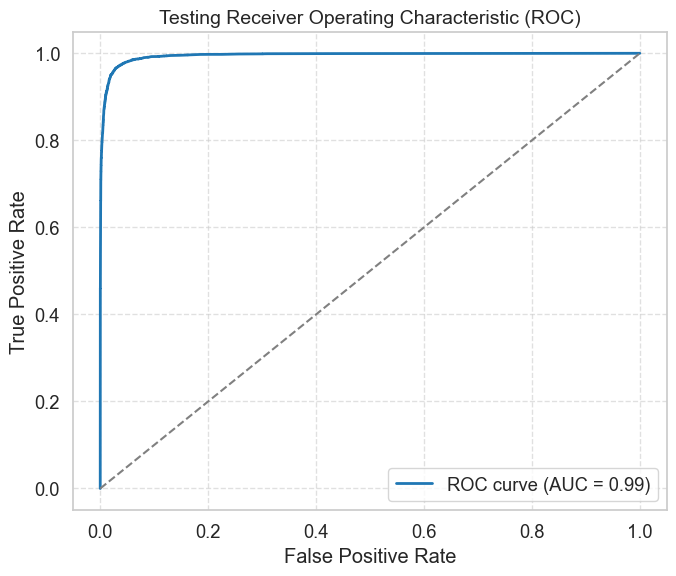

In [28]:
# Call the plot_model_evaluation function to visualize the ROC curve for the testing set
plot_model_evaluation(
    y_true=y_test,  # Ground truth labels for the test set
    y_pred_proba=y_proba_for_test,  # Predicted probabilities for the positive class from the model (test set)
    title="Testing"  # Title for the ROC plot (indicating that this is for the testing set)
)


## Model Evaluation: ROC AUC Scores

### Training ROC AUC:
- The ROC AUC score for the training dataset is **1.0**. This indicates that the model performs perfectly on the training data, correctly distinguishing between the positive and negative classes across all thresholds.

### Testing ROC AUC:
- The ROC AUC score for the testing dataset is **0.99**. This indicates excellent generalization performance, with the model maintaining high accuracy in distinguishing between classes on unseen data, though slightly lower than on the training data.

### Conclusion:
- A training ROC AUC of 1.0 and a testing ROC AUC of 0.99 suggest that the model is overfitting to the training data but still performs very well on the test data. The slight difference between the training and testing ROC AUC scores is within an acceptable range, indicating that the model is generalizing well while capturing the important patterns in the data.


In [29]:
# Function to plot the top feature importances from a tree-based model
def plot_feature_importances(model, feature_names, top_n=40):
    """
    Plot the top_n feature importances from a tree-based model.
    
    Args:
        model: Trained model with the `feature_importances_` attribute (e.g., Random Forest, Gradient Boosting).
        feature_names: List of feature names corresponding to the model's input features.
        top_n: Number of top features to display (default is 40).
    """
    
    # Extract feature importances from the trained model
    importances = model.feature_importances_

    # Sort the feature importances in descending order and get the indices of the top_n features
    indices = importances.argsort()[::-1][:top_n]

    # Get the feature names corresponding to the top_n features
    top_features = [feature_names[i] for i in indices]

    # Get the importances for the top_n features
    top_importances = importances[indices]

    # Set up the plot
    plt.figure(figsize=(10, 8))

    # Create a horizontal bar plot to visualize the top feature importances
    sns.barplot(x=top_importances, y=top_features)

    # Title and labels for the plot
    plt.title(f"Top {top_n} Feature Importances")
    plt.xlabel("Importance")
    plt.ylabel("Feature")

    # Make the layout tight so the labels are properly displayed
    plt.tight_layout()

    # Display the plot
    plt.show()

    # Return the names of the top features for further analysis if needed
    return top_features


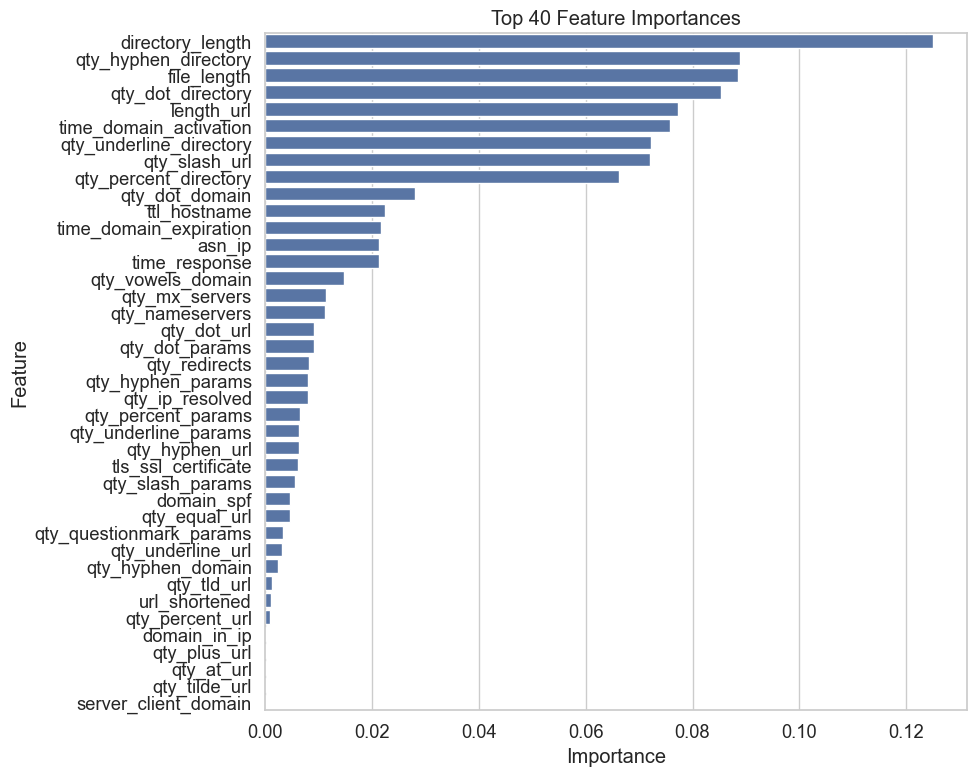

In [30]:
# After training or loading your RandomForest:
# Get the list of feature names from the training data (X_train)
feature_names = X_train.columns.tolist()

# Plot the top 40 most important features and return the top features
top_features = plot_feature_importances(rf_model, feature_names, top_n=40)


## Model Performance Evaluation

### ✅ **Classification Report:**

The classification report provides a summary of the model's performance across both classes (0 and 1). Below are the key metrics:

- **Precision**: The proportion of positive predictions that are actually correct.
- **Recall**: The proportion of actual positives that are correctly identified.
- **F1-Score**: The harmonic mean of Precision and Recall, providing a balance between them.

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| **0** | 0.98      | 0.97   | 0.98     | 11364   |
| **1** | 0.95      | 0.96   | 0.96     | 6078    |

- **Accuracy:** 0.97 (97% of predictions are correct)
- **Macro Average:** 
  - Precision: 0.96 
  - Recall: 0.97 
  - F1-Score: 0.97
- **Weighted Average:** 
  - Precision: 0.97 
  - Recall: 0.97 
  - F1-Score: 0.97

### 📊 **Confusion Matrix:**

The confusion matrix visually shows the number of correct and incorrect predictions made by the model.




- **True Positives (TP):** 5863 (The model correctly predicted class 1)
- **True Negatives (TN):** 11035 (The model correctly predicted class 0)
- **False Positives (FP):** 329 (The model incorrectly predicted class 1 when it was actually 0)
- **False Negatives (FN):** 215 (The model incorrectly predicted class 0 when it was actually 1)

### Conclusion:

The model has high performance with an **accuracy of 97%**, and exhibits strong **precision**, **recall**, and **F1-scores** for both classes. The confusion matrix indicates the model is more confident in predicting class 0 (with higher true negatives), although it still makes a few misclassifications with **false positives** (329) and **false negatives** (215). The model's predictions for class 1 are slightly less accurate than for class 0 but still perform well overall.



### Saving Model

In [31]:
import dill
with open("./model.pkl" ,"wb") as file:
   dill.dump(rf_model , file)